In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("heart_2022.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


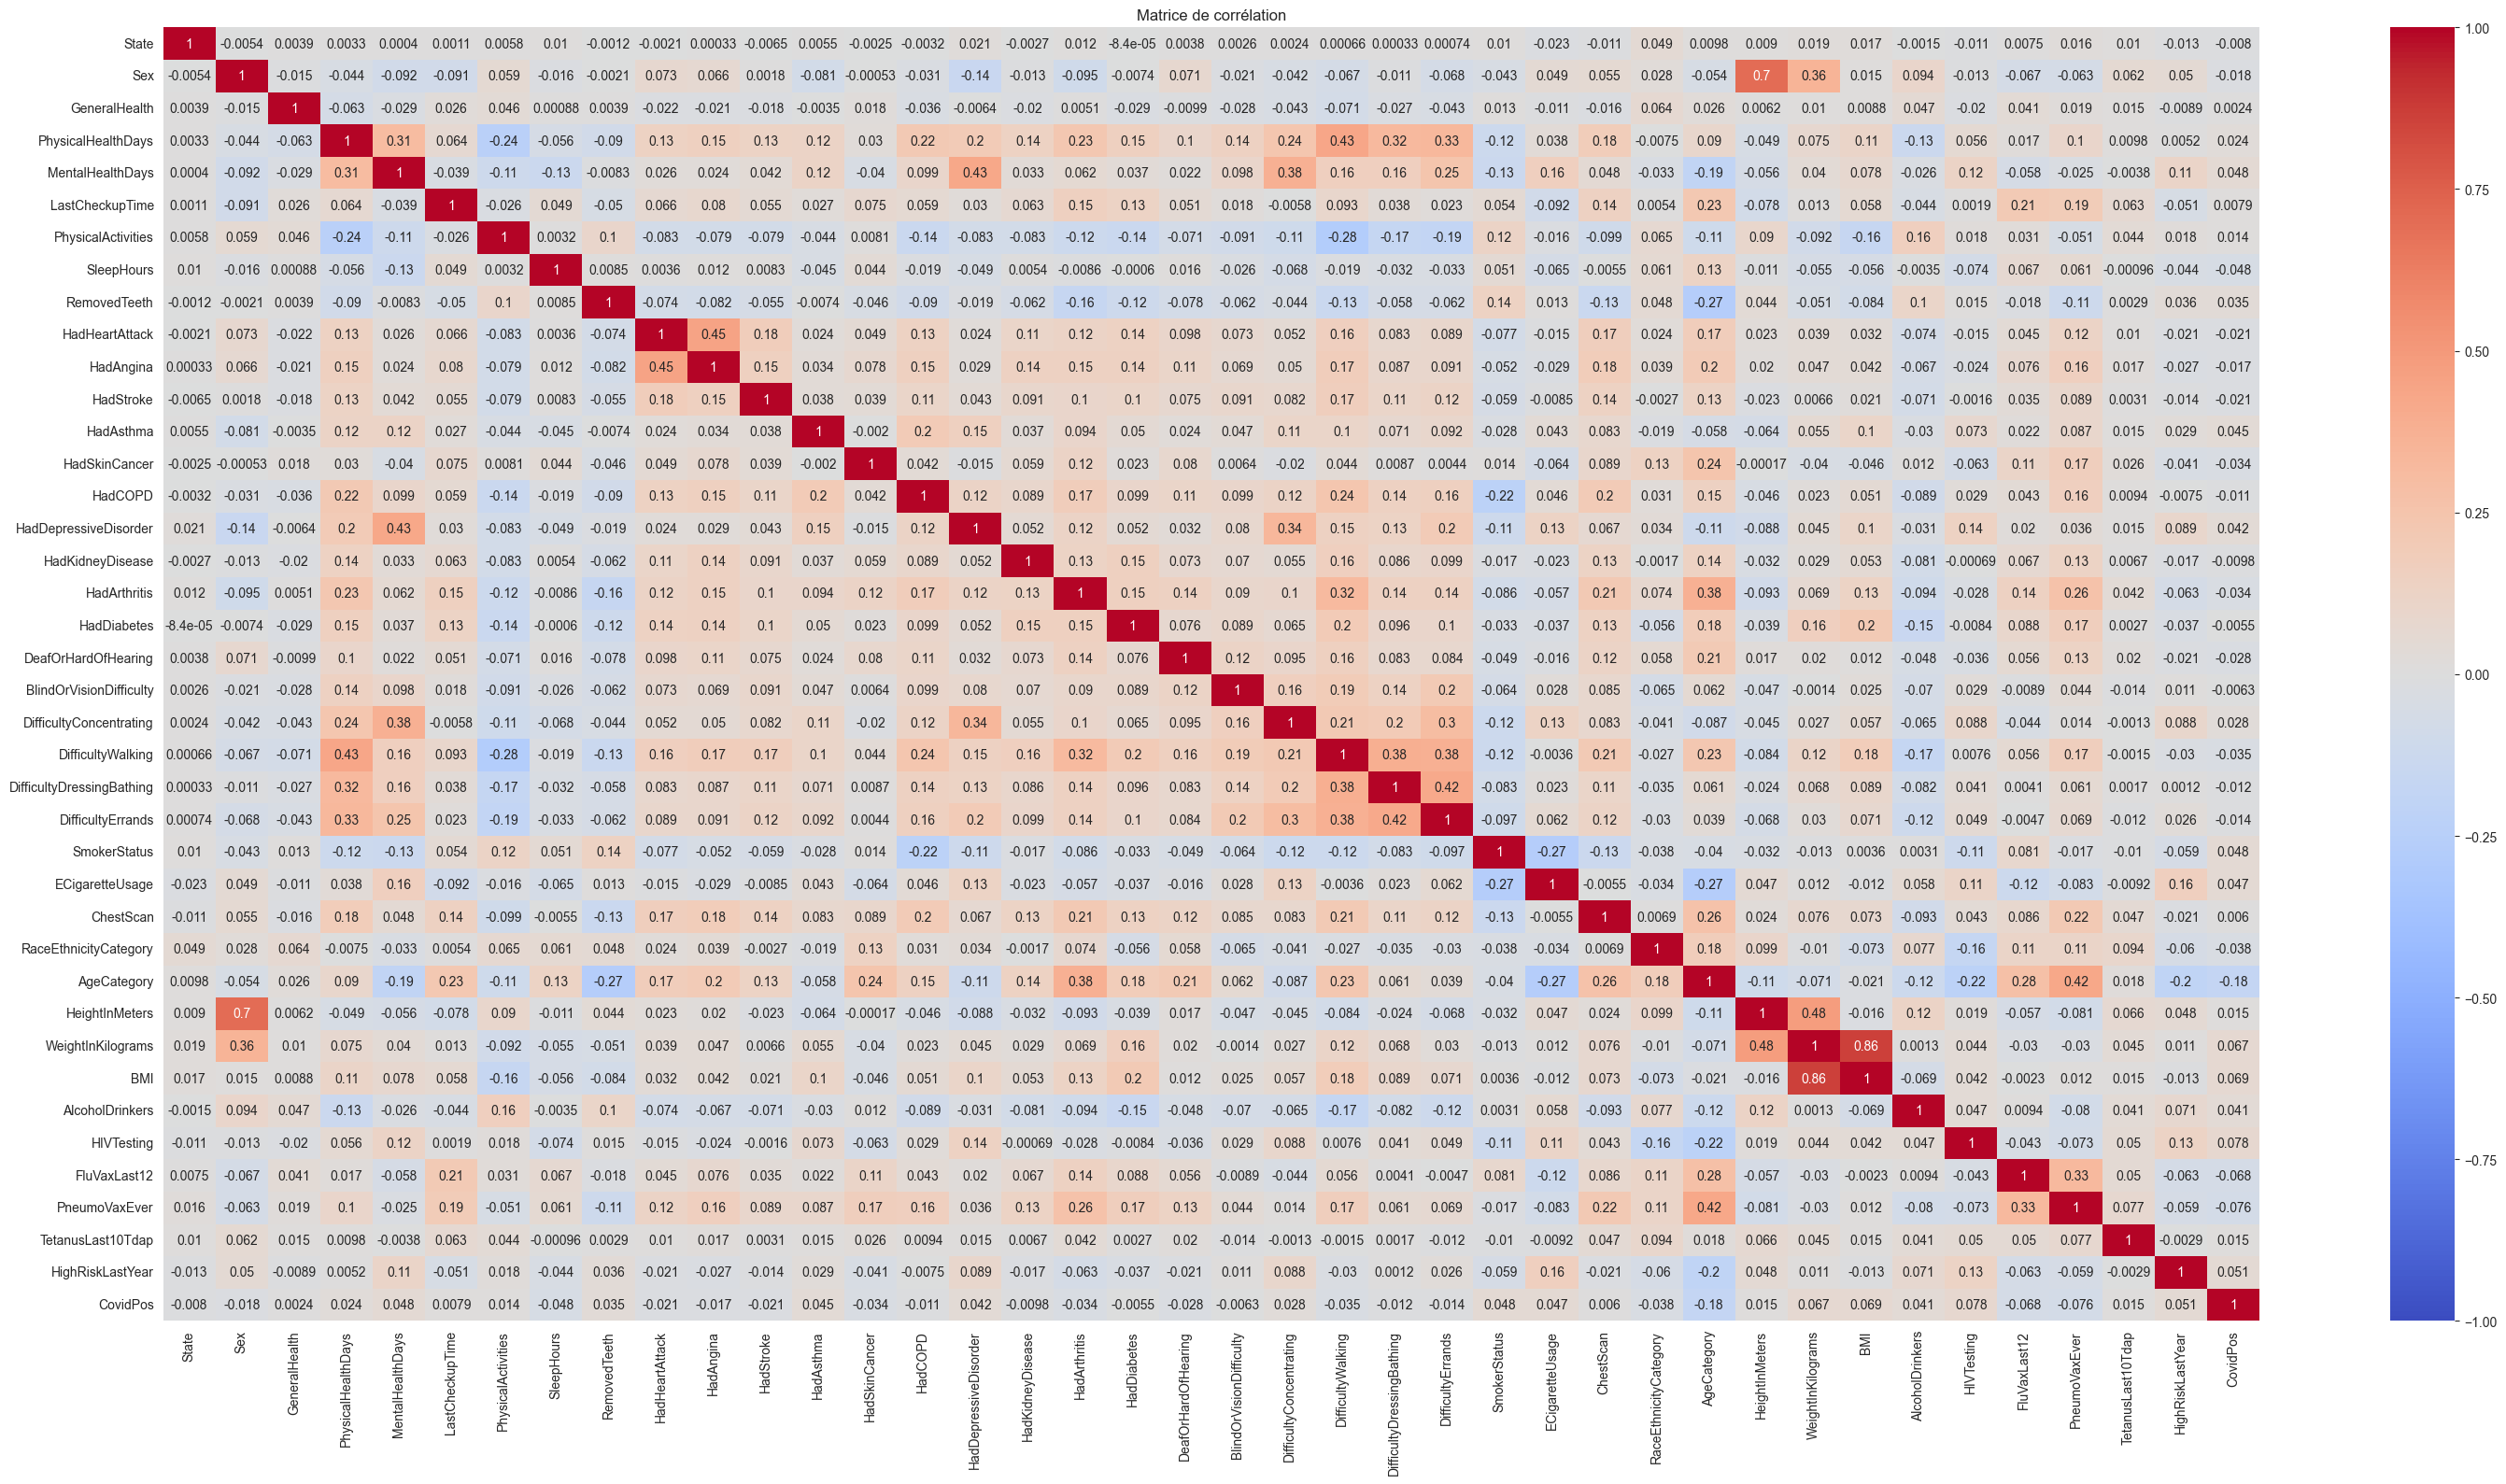

In [17]:
categorical_columns = []
for c in df.columns:
    categorical_columns.append(c)

for col in categorical_columns:
    df[col] = pd.Categorical(df[col]).codes

numeric_columns = df.select_dtypes(include=[np.number]).columns

corr_matrix = df[numeric_columns].corr()

# Création du heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()


HadHeartAttack        No       Yes
Sex                               
Female          0.971181  0.028819
Male            0.939584  0.060416


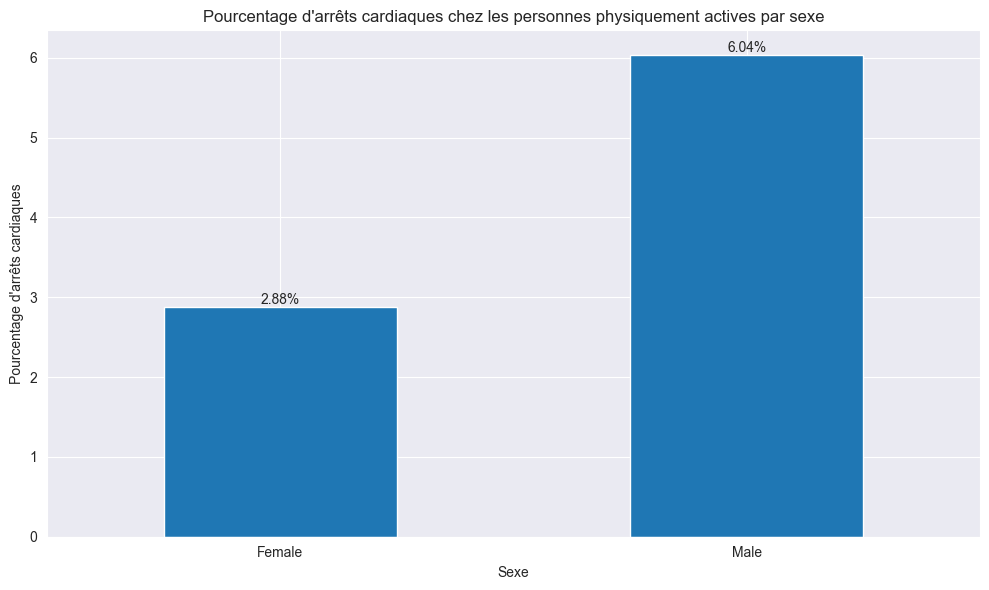

In [14]:
df_activity = df[df['PhysicalActivities'] == 'Yes']

result = df_activity.groupby('Sex')['HadHeartAttack'].value_counts(normalize=True).unstack()
print(result)
result = result['Yes'] * 100

plt.figure(figsize=(10, 6))
result.plot(kind='bar')
plt.title('Pourcentage d\'arrêts cardiaques chez les personnes physiquement actives par sexe')
plt.xlabel('Sexe')
plt.ylabel('Pourcentage d\'arrêts cardiaques')
plt.xticks(rotation=0)

for i, v in enumerate(result):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()